In [1]:
from event_table import event_table
from plot_event import plot_event
import matplotlib.pyplot as plt

In [2]:
# Issues: getting the right thermostat data -- hsp, csp, IAT not the columns
# some event days dont work
# get the mapping from the MDAL queries
# BASELINE: SCE 10 days before 
# get energy consumed in even vs baseline 
site = 'ciee'
start = '2018-10-01T00:00:00Z'
end = '2018-10-19T00:00:00Z'
event_day = '2018-10-12T00:00:00'
event_start_hour = 14
event_end_hour = 18

tbl = event_table(site, event_day, start, end, 14, 18);

                           eeadc8ed-6255-320d-b845-84f44748fe95  \
2018-10-12 00:00:00-07:00                                  72.0   

                           e4d39723-5907-35bd-a9b2-fc57b58b3779  \
2018-10-12 00:00:00-07:00                                  56.0   

                           6cbee2ae-06e7-3fc3-a2fc-698fa3deadee  \
2018-10-12 00:00:00-07:00                                  72.0   

                           e4e0db0b-1c15-330e-a864-011e558f542e  
2018-10-12 00:00:00-07:00                                  72.0  
                           dbbf4a91-107a-3b15-b2c0-a49b54116daa  \
2018-10-12 00:00:00-07:00                                  76.0   

                           d38446d4-32cc-34bd-b293-0a3871a6759b  \
2018-10-12 00:00:00-07:00                                  85.0   

                           9fa56ac1-0f8a-3ad2-86e8-72e816b875ad  \
2018-10-12 00:00:00-07:00                                  76.0   

                           0d037818-02c2-3e5b-87e9-94570d4

In [ ]:
tbl.df.head()

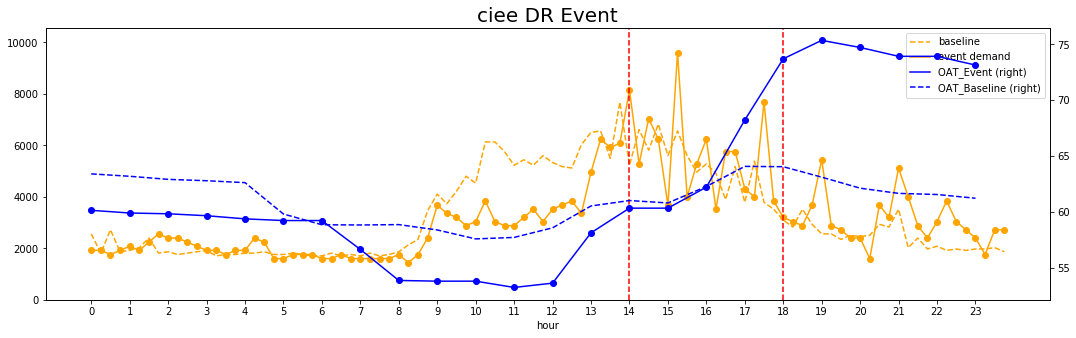

<Figure size 432x288 with 0 Axes>

In [9]:
plot_event(site, event_day, start, end, 14, 18);

In [14]:
from pricing.cost_calculator.cost_calculator import CostCalculator
from pricing.openei_tariff.openei_tariff_analyzer import *
from pricing.cost_calculator.tariff_structure import *
import datetime as dtime

In [15]:
ciee_tariff = OpenEI_tariff(utility_id='14328',
                  sector='Commercial',
                  tariff_rate_of_interest='A-1 Small General Service',  # need to add Small General Service to get the right data ..
                  distrib_level_of_interest=None,
                  phasewing='Single',
                  tou=True)

In [16]:
calculator = CostCalculator()

In [22]:
ciee_tariff.read_from_json()

0

In [38]:
tariff_struct_from_openei_data(ciee_tariff, calculator, pdp_event_filenames='PDP_events.json')

In [40]:
pd_prices, map_prices = calculator.get_electricity_price(timestep=TariffElemPeriod.HOURLY,
                                                        range_date=(dtime.datetime(2018,
                                                                                      7,
                                                                                      25, 0, 0, 0).replace(tzinfo=pytz.timezone('US/Pacific')),
                                                                    dtime.datetime(2018,
                                                                                      7,
                                                                                      25, 23, 59,
                                                                                      59).replace(tzinfo=pytz.timezone('US/Pacific'))))
pd_prices = pd_prices.fillna(0)
energyPrices = pd_prices.customer_energy_charge.values + pd_prices.pdp_non_event_energy_credit.values + pd_prices.pdp_event_energy_charge.values
demandPrices = pd_prices.customer_demand_charge_season.values + pd_prices.pdp_non_event_demand_credit.values + pd_prices.customer_demand_charge_tou.values


In [41]:
energyPrices

array([0.2073 , 0.2073 , 0.2073 , 0.2073 , 0.2073 , 0.2073 , 0.2073 ,
       0.2073 , 0.23465, 0.23465, 0.23465, 0.23465, 0.2583 , 0.2583 ,
       0.8583 , 0.8583 , 0.8583 , 0.8583 , 0.23465, 0.23465, 0.23465,
       0.2073 , 0.2073 , 0.2073 ])

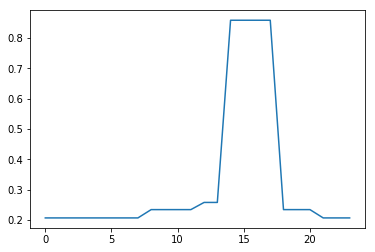

In [42]:
plt.plot(energyPrices)

In [43]:
len(energyPrices)

24

In [51]:
pd.date_range(start=start, periods=360, freq='15min' )

DatetimeIndex(['2018-10-01 00:00:00+00:00', '2018-10-01 00:15:00+00:00',
               '2018-10-01 00:30:00+00:00', '2018-10-01 00:45:00+00:00',
               '2018-10-01 01:00:00+00:00', '2018-10-01 01:15:00+00:00',
               '2018-10-01 01:30:00+00:00', '2018-10-01 01:45:00+00:00',
               '2018-10-01 02:00:00+00:00', '2018-10-01 02:15:00+00:00',
               ...
               '2018-10-04 15:30:00+00:00', '2018-10-04 15:45:00+00:00',
               '2018-10-04 16:00:00+00:00', '2018-10-04 16:15:00+00:00',
               '2018-10-04 16:30:00+00:00', '2018-10-04 16:45:00+00:00',
               '2018-10-04 17:00:00+00:00', '2018-10-04 17:15:00+00:00',
               '2018-10-04 17:30:00+00:00', '2018-10-04 17:45:00+00:00'],
              dtype='datetime64[ns, UTC]', length=360, freq='15T')

In [8]:
tbl['event-demand'].groupby(tbl.index.hour).sum()

0      7520.0
1      8800.0
2      9120.0
3      7520.0
4      8160.0
5      6880.0
6      6560.0
7      6400.0
8      7360.0
9     13120.0
10    12800.0
11    12640.0
12    14400.0
13    23200.0
14    26720.0
15    22560.0
16    21280.0
17    19840.0
18    12800.0
19    13440.0
20    10880.0
21    14400.0
22    12640.0
23     9600.0
Name: event-demand, dtype: float64

In [23]:
dtime.timedelta()

datetime.timedelta(0)

In [36]:
td = (pd.to_datetime(end) - pd.to_datetime(start) + pd.to_timedelta(100000))

In [41]:
 (3600*24*td.days + td.seconds)/(60*15)

1728.0

In [9]:
from calc_price import *

In [14]:
options =  {
        'utility_id': '14328',
        'sector': 'Commercial',
        'tariff_rate_of_interest': 'A-1 Small General Service', 
        'distrib_level_of_interest': None, #TODO: Figure out what this is
        'phasewing': 'Single',
        'tou': True
    }

In [6]:
power_vector = tbl['event-demand']

In [7]:
calc_total_price(power_vector, tariff_options=options, start_datetime=power_vector.index[0], end_datetime=power_vector.index[-1])

[0.21144 0.21144 0.21144 0.21144 0.21144 0.21144 0.21144 0.21144 0.23879
 0.23879 0.23879 0.23879 0.26244 0.26244 0.26244 0.26244 0.26244 0.26244
 0.23879 0.23879 0.23879 0.21144 0.21144 0.21144]
0     1880.0
1     2200.0
2     2280.0
3     1880.0
4     2040.0
5     1720.0
6     1640.0
7     1600.0
8     1840.0
9     3280.0
10    3200.0
11    3160.0
12    3600.0
13    5800.0
14    6680.0
15    5640.0
16    5320.0
17    4960.0
18    3200.0
19    3360.0
20    2720.0
21    3600.0
22    3160.0
23    2400.0
Name: event-demand, dtype: float64


18514.496400000004

In [8]:
tbl['df'].head()

,baseline-demand,event-demand,baseline-weather,event-weather,baseline-IAT,event-IAT
2018-10-12 00:00:00,2560.000000,1920.0,63.408277,60.1448,74.677839,73.709146
2018-10-12 00:15:00,1813.333333,1920.0,63.408277,60.1448,74.721035,73.700000
2018-10-12 00:30:00,2720.000000,1760.0,63.408277,60.1448,74.695951,73.690596
2018-10-12 00:45:00,1866.666667,1920.0,63.408277,60.1448,74.646135,73.675000
2018-10-12 01:00:00,1920.000000,2080.0,63.191550,59.9063,74.692612,73.662500


In [36]:
def agg_tbl(table, event_start_hr, event_end_hr, tariff_opts):
    date = str(table.index[0].date())
    energy_baseline = power_15min_to_hourly_energy(table['baseline-demand'])
    energy_event = power_15min_to_hourly_energy(table['event-demand'])
    full_day_baseline = sum(energy_baseline)
    full_day_event = sum(energy_event)
    window_baseline = sum(energy_baseline[(energy_baseline.index >= event_start_hr) & (energy_baseline.index <= event_end_hr)])
    window_event = sum(energy_event[(energy_event.index >= event_start_hr) & (energy_event.index <= event_end_hr)])
    baseline_cost = calc_total_price(table['baseline-demand'], tariff_opts, table['baseline-demand'].index[0], table['baseline-demand'].index[-1])
    event_cost = calc_total_price(table['event-demand'], tariff_opts, table['event-demand'].index[0], table['baseline-demand'].index[-1])
    event_peak_temp = max(table['event-weather'])
    baseline_peak_temp = max(table['baseline-weather'])
    max_demand_baseline = max(table['baseline-demand'])
    max_demand_event = max(table['event-demand'])
    return {
        'date': date,
        'baseline_full': full_day_baseline,
        'event_full': full_day_event,
        'baseline_window': window_baseline,
        'event_window': window_event,
        'baseline_peak_demand': max_demand_baseline,
        'event_peak_demand': max_demand_event,
        'baseline_cost': baseline_cost,
        'event_cost': event_cost,
        'event_peak_temp': event_peak_temp,
        'baseline_peak_temp': baseline_peak_temp
    }
    

In [37]:
agg_tbl(tbl['df'], 14, 18, options)

[0.21144 0.21144 0.21144 0.21144 0.21144 0.21144 0.21144 0.21144 0.23879
 0.23879 0.23879 0.23879 0.26244 0.26244 0.26244 0.26244 0.26244 0.26244
 0.23879 0.23879 0.23879 0.21144 0.21144 0.21144]
0     2240.000000
1     2040.000000
2     1826.666667
3     1786.666667
4     1813.333333
5     1760.000000
6     1746.666667
7     1746.666667
8     2453.333333
9     4213.333333
10    5640.000000
11    5373.333333
12    5413.333333
13    6560.000000
14    6120.000000
15    5680.000000
16    4813.333333
17    4120.000000
18    3093.333333
19    2493.333333
20    2680.000000
21    2480.000000
22    1973.333333
23    1960.000000
Name: baseline-demand, dtype: float64
[0.21144 0.21144 0.21144 0.21144 0.21144 0.21144 0.21144 0.21144 0.23879
 0.23879 0.23879 0.23879 0.26244 0.26244 0.26244 0.26244 0.26244 0.26244
 0.23879 0.23879 0.23879 0.21144 0.21144 0.21144]
0     1880.0
1     2200.0
2     2280.0
3     1880.0
4     2040.0
5     1720.0
6     1640.0
7     1600.0
8     1840.0
9     3280.0
10    32

{'date': '2018-10-12',
 'baseline_full': 80026.66666666666,
 'event_full': 77160.0,
 'baseline_window': 23826.666666666668,
 'event_window': 25800.0,
 'baseline_peak_demand': 7680.0,
 'event_peak_demand': 9600.0,
 'baseline_cost': 19298.519733333334,
 'event_cost': 18514.496400000004,
 'event_peak_temp': 75.35862500000006,
 'baseline_peak_temp': 64.07877500000002}